El algoritmo FDTD propuesto por primera vez por Kane Yee en 1966 emplea diferencias centrales de segundo orden. El algoritmo puede resumirse como sigue:

1. Sustituir todas las derivadas de las leyes de Ampere y Faraday por diferencias finitas. Discretizar el espacio y el tiempo de forma que los campos eléctricos y magnéticos estén escalonados tanto en el espacio como en el tiempo.
2. Resolver las ecuaciones en diferencias resultantes para obtener ecuaciones de actualización que expresen los campos futuros (desconocidos) en términos de los campos pasados (conocidos).
3. Obtener los campos magnéticos en el futuro.
4. Obtener los campor elécticos en el futuro
5. Repetir los dos pasos anteriores hasta obtener los campos a lo largo de la duración deseada.

Primero será presentado el método en una dimensión espacial. 

En ausencia de cargas y suponiendo que el campo eléctrico solo tiene componente en $z$, la ley de Faraday puede escribirse como:

$$
-\mu \frac{\partial \vec H}{\partial t} = \nabla \times \vec E = -\frac{\partial E_z}{\partial x} \hat y
$$

Expandiendo el lado izquierdo se puede ver que $\vec H$ sólo tendrá componente en la dirección $y$. Sabiendo esto la ley de Ampere será: 

$$
\epsilon \frac{\partial \vec E}{\partial t} = \nabla \times \vec H = -\frac{\partial H_y}{\partial x} \hat z
$$

De esta manera, las ecuaciones escalares a discretizar son:

$$
\mu \frac{H_y}{\partial t} = \frac{\partial E_z}{\partial x}
$$

$$
\epsilon \frac{E_z}{\partial t} = \frac{\partial H_y}{\partial x}
$$

La primera ecuación da la derivada temporal del campo magnético en términos de la derivada espacial del campo eléctrico. A la inversa, la segunda ecuación da la derivada temporal del campo eléctrico en términos de la derivada espacial del campo magnético. del campo eléctrico en función de la derivada espacial del campo magnético. Como se verá, la primera ecuación se utilizará para hacer avanzar el campo magnético en el tiempo, mientras que la segunda se utilizará para hacer avanzar el campo eléctrico. Un método en el que se hace avanzar una cantidad y luego otra, y luego se repite el proceso, se conoce como método "leapfrog" (del inglés "salto de rana").

El siguiente paso es reemplazar las derivadas por diferencias finitas centradas. Los puntos discretos en el espacio y el tiempo se denotarán de la siguiente manera:

$$
	E_z(x, t) \rightarrow (E_z)^q_m
$$

De manera similar se utilizará $(H_y)^q_m$ para el campo magnético. Los puntos discretos de los campos se colocarán en el espacio siguiendo la cuadricula de Yee. De esta forma, el campo eléctrico estará en los puntos enteros de la cuadrícula y el campo magnético en los puntos semienteros. 

Reemplazando la derivada temporal por una diferencia finita centrada y la derivada espacial por una diferencia finita adelantada, la ley de Faraday se puede discretizar en $((m + \frac{1}{2})\Delta x, q\Delta t)$:

$$
\mu \frac{(H_y)^{q+\frac{1}{2}}_{m+\frac{1}{2}} - (H_y)^{q-\frac{1}{2}}_{m+\frac{1}{2}}}{\Delta t} = \frac{(E_z)^q_{m+1}- (E_z)^q_{m}}{\Delta x}
$$

Que se puede resolver para encontrar $H_y^{q+\frac{1}{2}} [m+\frac{1}{2}]$:

$$
(H_y)^{q+\frac{1}{2}}_{m+\frac{1}{2}} = (H_y)^{q-\frac{1}{2}}_{m+\frac{1}{2}} + \frac{\Delta t}{\mu \Delta x} ((E_z)^q_{m+1}- (E_z)^q_{m})
$$

Procediendo de manera similar en $(m\Delta x, (q+ \frac{1}{2})\Delta t)$ para la ley de Ampere:

$$
\epsilon \frac{(E_z)^{q+1}_{m} - (E_z)^{q}_{m}}{\Delta t} = \frac{(H_y)^{q + \frac{1}{2}}_{m+\frac{1}{2}} - (H_y)^{q+ \frac{1}{2}}_{m-\frac{1}{2}}}{\Delta x}
$$

Y resolviendo para encontrar el campo eléctrico en el siguiente paso temporal:

$$
(E_z)^{q+1}_{m} = (E_z)^{q}_{m} + \frac{\Delta t}{\epsilon \Delta x}\left((H_y)^{q + \frac{1}{2}}_{m+\frac{1}{2}} - (H_y)^{q+ \frac{1}{2}}_{m-\frac{1}{2}}\right)
$$

A menudo es conveniente representar los coeficientes de actualización $\frac{\Delta t}{\epsilon \Delta x}$ y $\frac{\Delta t}{\mu \Delta x}$ en términos de la relación entre lo lejos que puede propagarse la energía en un solo paso temporal y el paso espacial. La velocidad velocidad a la que puede viajar la energía electromagnética es la velocidad de la luz en el espacio libre $c = \frac{1}{\sqrt{\epsilon_0 \mu_0}}$ y, por tanto la distancia máxima que puede recorrer la energía en un paso temporal es $c\Delta t$ (el símbolo c se reservará para la velocidad de la luz en el espacio libre). El cociente $S_c = \frac{c\Delta t}{\Delta x}$ suele denominarse el número de Courant. Desempeña un papel importante en la determinación de la estabilidad de una simulación. Siendo $\mu = \mu_r \mu_0$ y $\epsilon = \epsilon_r \epsilon_0$, los coeficientes pueden escribirse:

$$
\frac{\Delta t}{\mu \Delta x} = \frac{S_c}{\mu c} = \frac{S_c \sqrt{\epsilon_0 \mu_0}}{\mu} = \frac{S_c \sqrt{\epsilon_0}}{\mu_r \sqrt{\mu_0}} = \frac{S_c }{\mu_r \eta_0}
$$

Junto con $\frac{\Delta t}{\epsilon \Delta x} = \frac{S_c \eta_0}{\epsilon_r}$. $\eta_0 = \sqrt \frac{\epsilon_0}{\mu_0}$ es la impedancia característica del espacio vacío, medida en Ohmnios. Al ser $S_c$, $\mu_r$ y $\epsilon_r$ adimensionales, $\eta_0$ representará todas las unidades del problema. Por ahora la impedancia se considerá constante.

En las simulaciones FDTD existen restricciones en cuanto al tamaño del paso temporal. Si es demasiado grande el algoritmo produce resultados inestables (es decir, los números obtenidos carecen de sentido y tienden rápidamente al infinito). En esta fase no vamos a considerar un análisis riguroso de la estabilidad. Sin embargo, pensando en la forma en que se propagan los campos en una cuadrícula FDTD, parece lógico que la energía no pueda propagarse más allá de un paso espacial por cada paso temporal, es decir, $c\Delta t < \Delta x$. Esto se debe a que en el algoritmo FDTD cada nodo solo afecta a sus vecinos más cercanos. En un ciclo completo de actualización de los campos, lo más lejos que podría propagarse una perturbación es un paso espacial. Resulta que la relación óptima para el número de Courant (en términos de minimizar los errores numéricos) es también la relación máxima. Por lo tanto, para las simulaciones unidimensionales consideradas inicialmente:

$$
S_c = \frac{c\Delta t}{\Delta x} = 1
$$

Para poder completar la simulación, es necesario considerar las condiciones de contorno del problema y las condiciones iniciales. Al existir un número finito de puntos, no es posible usar las ecuaciones de actualización para los puntos iniciales y finales, por lo que se deben tratar aparte. En este caso sencillo, se resolverán ambas cuestiones al mismo tiempo: para el campo eléctrico en $x = 0$ se introducirá una fuente que decae exponencialmente; y para el campo magnético en el término del eje x se mantendrá nulo. 

A la hora de programar las ecuaciones de actualización, la cuadrícula con puntos semienteros se reemplazará por una matriz (array) y se indexará con numeros enteros. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Resoluciones espaciotemporales
nt = 250
nx = 200

# Definimos campos
E_z = np.zeros(nx)
H_y = np.zeros(nx)

# Impedancia del vacío en ohmnios
imp_0 = 377.0

for t in range(nt):
    # Actualiza campo magnético, no actualizamos H_y[-1]
    for i in range(0, nx-1):
        H_y[i] = H_y[i] + (E_z[i + 1] - E_z[i])/imp_0
    # Actualiza campo eléctrico, no actualizamos E_z[0]
    for i in range(1, nx):
        E_z[i] = E_z[i] + (H_y[i] - H_y[i - 1])*imp_0
    # Expresa explicitamente el hecho de que H_y[-1] es cero
    H_y[-1] = 0
    # Nodo fuente
    E_z[0] = np.exp(-(t - 30)**2/100)

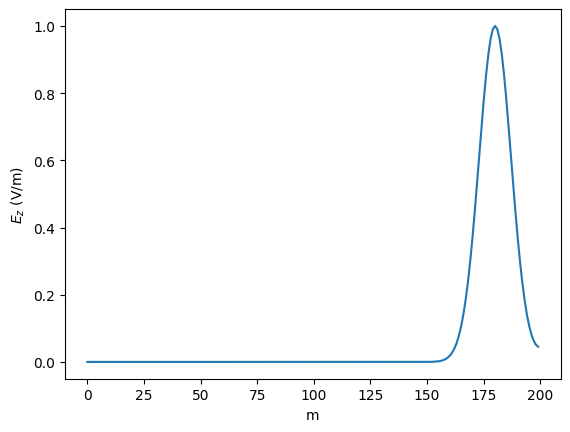

In [ ]:
# Representa el campo eléctrico en z al terminar la simulación
plt.plot(E_z)
plt.xlabel("Paso espacial")
plt.ylabel(r"$E_z$ (V/m)")
plt.show()

Podemos cambiar los bucles internos por actualizaciones usando las herramientas propias de matplotlib, lo que lo hace mucho más rápido.

In [21]:
# Resoluciones espaciotemporales
nt = 250
nx = 200

# Definimos campos
E_z = np.zeros(nx)
H_y = np.zeros(nx)

# Impedancia del vacío en ohmnios
imp_0 = 377.0

for t in range(nt):
    # Actualiza campo magnético, no actualizamos H_y[-1]
    H_y[0:-1] = H_y[0:-1] + (E_z[1:] - E_z[0:-1])/imp_0
    # Actualiza campo eléctrico, no actualizamos E_z[0]
    E_z[1:] = E_z[1:] + (H_y[1:] - H_y[0:-1])*imp_0
    # Expresa explicitamente el hecho de que H_y[-1] es cero
    H_y[-1] = 0
    # Nodo fuente
    E_z[0] = np.exp(-(t - 30)**2/100)

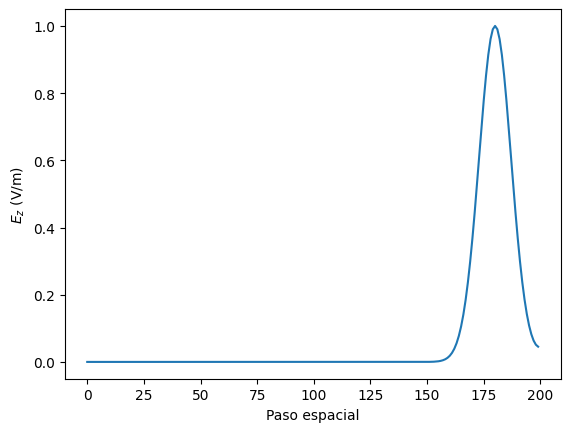

In [22]:
# Representa el campo eléctrico en z al terminar la simulación
plt.plot(E_z)
plt.xlabel("Paso espacial")
plt.ylabel(r"$E_z$ (V/m)")
plt.show()